In [418]:
# Konwolucja

In [419]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy.ndimage import convolve

In [420]:
image = io.imread('./images/circle.jpg', as_gray=True)

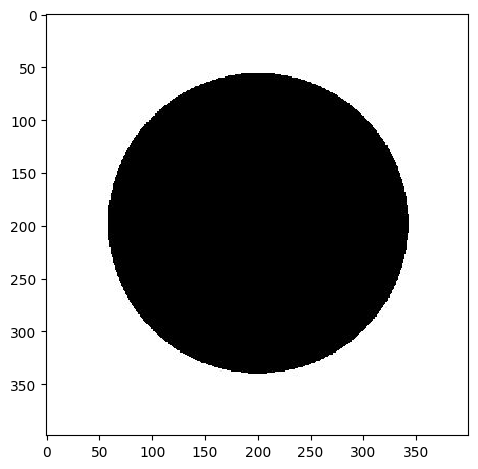

In [421]:
io.imshow(image)

In [422]:
# Laplacian edge detection kernel
kernel = np.array([
    [-1, -1, -1], 
    [-1, 8, -1], 
    [-1, -1, -1]
])

In [423]:
filtered_image = convolve(image, kernel)

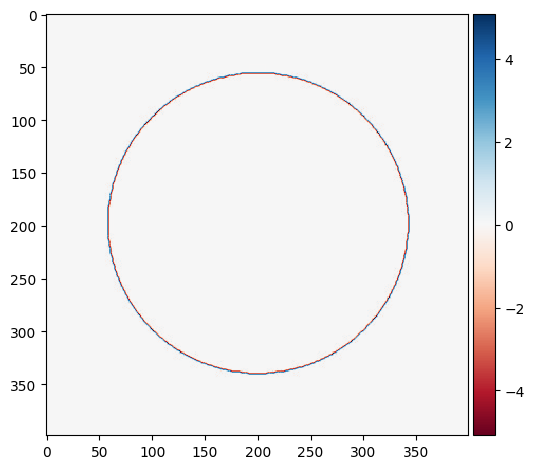

In [424]:
io.imshow(filtered_image)

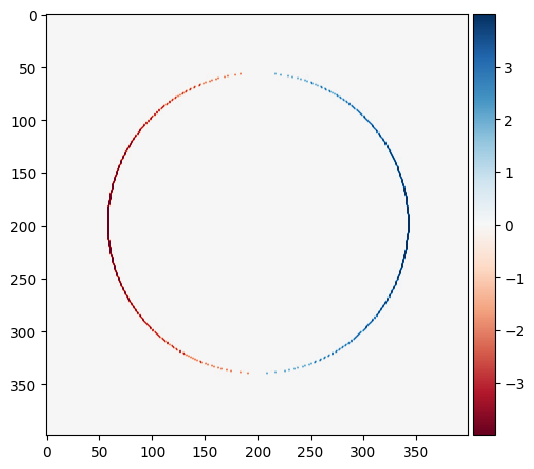

In [425]:
kernel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
filtered_image = convolve(image, kernel)
io.imshow(filtered_image)

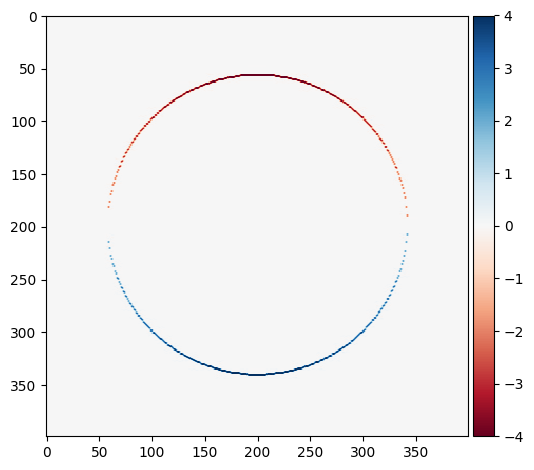

In [426]:
kernel = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])
filtered_image = convolve(image, kernel)
io.imshow(filtered_image)

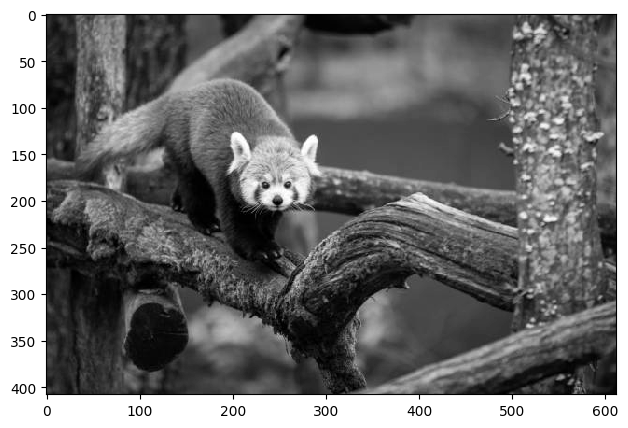

In [427]:
image = io.imread('./images/panda.jpg', as_gray=True)
io.imshow(image)

In [428]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

In [429]:
def _convolve(image, kernel):
    if image.ndim == 3:
        return np.dstack([convolve(image[:, :, channel], kernel) for channel in range(3)])
    return convolve(image, kernel)

In [430]:
# Gaussian kernel
kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

In [431]:
filtered_image = _convolve(image, kernel)

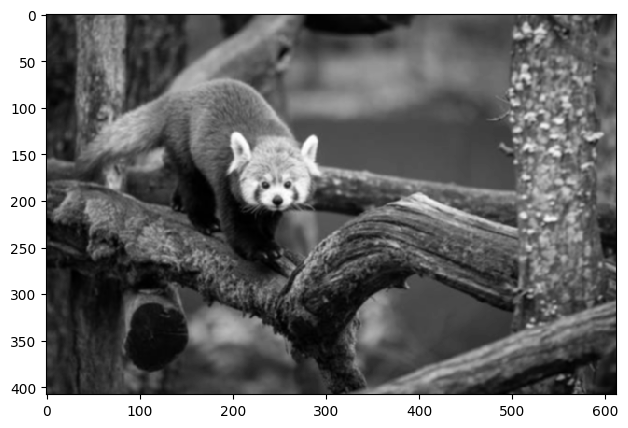

In [432]:
io.imshow(filtered_image)

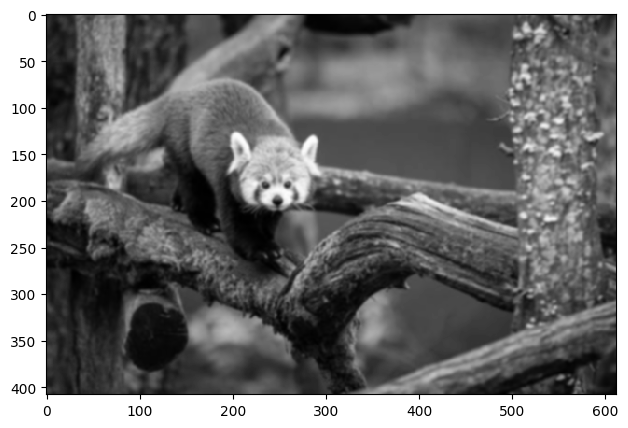

In [433]:
kernel = np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
], dtype=np.float64)
kernel /= np.sum(kernel)
filtered_image = _convolve(image, kernel)
io.imshow(filtered_image)

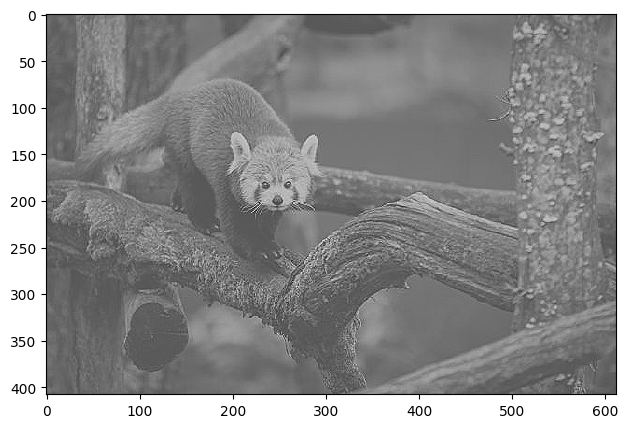

In [436]:
# Sharpen
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
filtered_image = _convolve(image, kernel)
# Normalize to [0, 1] range
filtered_image = normalize(filtered_image)
io.imshow(filtered_image)

## Sobel operator

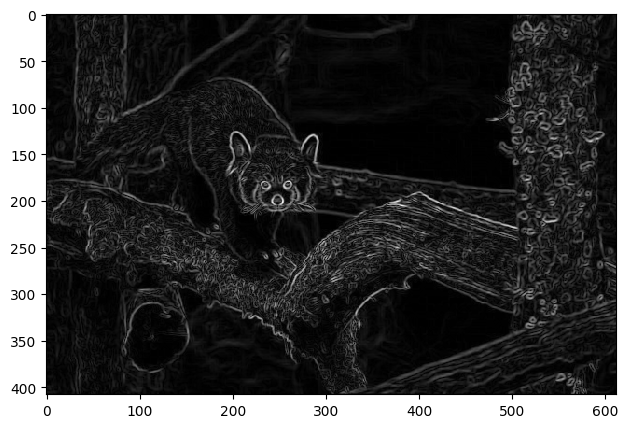

In [437]:
# Sobel operator - edge detection
# x-axis kernel
kernel = [
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]
gx = _convolve(image, kernel)

# y-axis kernel
kernel = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
]
gy = _convolve(image, kernel)

g = np.sqrt(gx**2 + gy**2)
g = normalize(g)

io.imshow(g)